In [1]:
import torch 
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from tqdm import tqdm
import random


from src.NN.custom_emlp_multistep import *
from src.NN.aug_multistep import *

/mnt/d_disk/ch20b065/.conda/envs/liegan/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/mnt/d_disk/ch20b065/.conda/envs/liegan/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
from Data.two_body_dataset import * 
from torch.utils.data import Subset, DataLoader

input_timesteps = 4
output_timesteps = 2
n_dim = 8

# data_dict = generate_two_body_dataset(
#         save_path='./data/two_body_dataset.pkl',
#         num_trajectories=2000,  # Smaller number for quick testing
#         t_span=(0, 10),
#         num_steps=100,
#         G=1.0,
#         m1=1.0,
#         m2=1.0,
#         min_radius=1.5,
#         max_radius=3.0,
#         eccentricity_range=(0.0, 0.5),
#         orbit_noise=0.01,
#         random_seed=42
#     )

train_dataset = TwoBodyDataset(
    save_path='./data/two_body_dataset.pkl',
    input_timesteps = input_timesteps,
    output_timesteps = output_timesteps,
    mode='train'
)

test_dataset = TwoBodyDataset(
    save_path='./data/two_body_dataset.pkl',
    input_timesteps = input_timesteps,
    output_timesteps = output_timesteps,
    mode='test'
)

# Get the actual size of the dataset
train_size = 2000
test_size = 400

# Sample accordingly
train_indices = np.random.choice(len(train_dataset), size=train_size, replace=False)
test_indices = np.random.choice(len(test_dataset), size=test_size, replace=False)

train_dataset = Subset(train_dataset,train_indices)
test_dataset = Subset(test_dataset,test_indices)


In [3]:
from src.NN.multi_step_pred import * 

print('\nTraining Multi Step Prediction Model...')

batch_size = 64 
epochs = 500 
lr = 1e-3 

model, stats = train_PredModel(train_dataset,test_dataset,batch_size,epochs,lr,n_dim,input_timesteps,output_timesteps)


Training Multi Step Prediction Model...
Starting training: 500 epochs


  1%|          | 3/500 [00:00<01:33,  5.34it/s]

Epoch 1/500, Train Loss: 0.137716, Test Loss: 0.018986


  2%|▏         | 12/500 [00:01<00:56,  8.61it/s]

Epoch 11/500, Train Loss: 0.021783, Test Loss: 0.003280


  4%|▍         | 22/500 [00:02<01:00,  7.88it/s]

Epoch 21/500, Train Loss: 0.017462, Test Loss: 0.002533


  6%|▋         | 32/500 [00:04<00:59,  7.86it/s]

Epoch 31/500, Train Loss: 0.015549, Test Loss: 0.002694


  8%|▊         | 42/500 [00:05<00:46,  9.77it/s]

Epoch 41/500, Train Loss: 0.014853, Test Loss: 0.002604


 10%|█         | 52/500 [00:06<00:40, 11.07it/s]

Epoch 51/500, Train Loss: 0.013659, Test Loss: 0.002534


 12%|█▏        | 62/500 [00:07<00:38, 11.31it/s]

Epoch 61/500, Train Loss: 0.013742, Test Loss: 0.002321


 14%|█▍        | 72/500 [00:07<00:37, 11.47it/s]

Epoch 71/500, Train Loss: 0.013422, Test Loss: 0.002173


 16%|█▋        | 82/500 [00:08<00:36, 11.51it/s]

Epoch 81/500, Train Loss: 0.012809, Test Loss: 0.002163


 18%|█▊        | 92/500 [00:09<00:35, 11.40it/s]

Epoch 91/500, Train Loss: 0.011992, Test Loss: 0.002829


 20%|██        | 102/500 [00:10<00:34, 11.64it/s]

Epoch 101/500, Train Loss: 0.011781, Test Loss: 0.001784


 22%|██▏       | 112/500 [00:11<00:34, 11.09it/s]

Epoch 111/500, Train Loss: 0.011070, Test Loss: 0.002044


 24%|██▍       | 122/500 [00:12<00:33, 11.35it/s]

Epoch 121/500, Train Loss: 0.010775, Test Loss: 0.001956


 26%|██▋       | 132/500 [00:13<00:33, 11.13it/s]

Epoch 131/500, Train Loss: 0.010163, Test Loss: 0.001847


 28%|██▊       | 142/500 [00:14<00:31, 11.40it/s]

Epoch 141/500, Train Loss: 0.009864, Test Loss: 0.002363


 30%|███       | 152/500 [00:14<00:30, 11.38it/s]

Epoch 151/500, Train Loss: 0.009858, Test Loss: 0.001969


 32%|███▏      | 162/500 [00:15<00:29, 11.44it/s]

Epoch 161/500, Train Loss: 0.009542, Test Loss: 0.002039


 34%|███▍      | 172/500 [00:16<00:28, 11.53it/s]

Epoch 171/500, Train Loss: 0.009256, Test Loss: 0.001890


 36%|███▋      | 182/500 [00:17<00:28, 11.28it/s]

Epoch 181/500, Train Loss: 0.009158, Test Loss: 0.002598


 38%|███▊      | 192/500 [00:18<00:26, 11.44it/s]

Epoch 191/500, Train Loss: 0.009042, Test Loss: 0.002202


 40%|████      | 202/500 [00:19<00:26, 11.19it/s]

Epoch 201/500, Train Loss: 0.008920, Test Loss: 0.001993


 42%|████▏     | 212/500 [00:20<00:25, 11.43it/s]

Epoch 211/500, Train Loss: 0.008741, Test Loss: 0.001812


 44%|████▍     | 222/500 [00:21<00:24, 11.41it/s]

Epoch 221/500, Train Loss: 0.008646, Test Loss: 0.002292


 46%|████▋     | 232/500 [00:21<00:23, 11.61it/s]

Epoch 231/500, Train Loss: 0.008294, Test Loss: 0.002175


 48%|████▊     | 242/500 [00:22<00:22, 11.60it/s]

Epoch 241/500, Train Loss: 0.008564, Test Loss: 0.002095


 50%|█████     | 252/500 [00:23<00:21, 11.32it/s]

Epoch 251/500, Train Loss: 0.008466, Test Loss: 0.002739


 52%|█████▏    | 262/500 [00:24<00:20, 11.47it/s]

Epoch 261/500, Train Loss: 0.007982, Test Loss: 0.001905


 54%|█████▍    | 272/500 [00:25<00:20, 11.34it/s]

Epoch 271/500, Train Loss: 0.008533, Test Loss: 0.002703


 56%|█████▋    | 282/500 [00:26<00:18, 11.69it/s]

Epoch 281/500, Train Loss: 0.008587, Test Loss: 0.002158


 58%|█████▊    | 292/500 [00:27<00:18, 11.28it/s]

Epoch 291/500, Train Loss: 0.008112, Test Loss: 0.003063


 60%|██████    | 302/500 [00:28<00:17, 11.57it/s]

Epoch 301/500, Train Loss: 0.007731, Test Loss: 0.002582


 62%|██████▏   | 312/500 [00:28<00:16, 11.55it/s]

Epoch 311/500, Train Loss: 0.007836, Test Loss: 0.002810


 64%|██████▍   | 322/500 [00:29<00:15, 11.49it/s]

Epoch 321/500, Train Loss: 0.007777, Test Loss: 0.002638


 66%|██████▋   | 332/500 [00:30<00:14, 11.72it/s]

Epoch 331/500, Train Loss: 0.007607, Test Loss: 0.003153


 68%|██████▊   | 342/500 [00:31<00:13, 11.42it/s]

Epoch 341/500, Train Loss: 0.007825, Test Loss: 0.002928


 70%|███████   | 352/500 [00:32<00:12, 11.67it/s]

Epoch 351/500, Train Loss: 0.007754, Test Loss: 0.002906


 72%|███████▏  | 362/500 [00:33<00:12, 11.31it/s]

Epoch 361/500, Train Loss: 0.007620, Test Loss: 0.002982


 74%|███████▍  | 372/500 [00:34<00:11, 11.46it/s]

Epoch 371/500, Train Loss: 0.007266, Test Loss: 0.002806


 76%|███████▋  | 382/500 [00:35<00:10, 11.22it/s]

Epoch 381/500, Train Loss: 0.007241, Test Loss: 0.002411


 78%|███████▊  | 392/500 [00:35<00:09, 11.48it/s]

Epoch 391/500, Train Loss: 0.007688, Test Loss: 0.002867


 80%|████████  | 402/500 [00:36<00:08, 11.36it/s]

Epoch 401/500, Train Loss: 0.007562, Test Loss: 0.002727


 82%|████████▏ | 412/500 [00:37<00:08, 10.84it/s]

Epoch 411/500, Train Loss: 0.007500, Test Loss: 0.002689


 85%|████████▍ | 423/500 [00:38<00:07,  9.89it/s]

Epoch 421/500, Train Loss: 0.007768, Test Loss: 0.002843


 87%|████████▋ | 433/500 [00:39<00:06, 11.15it/s]

Epoch 431/500, Train Loss: 0.007807, Test Loss: 0.003290


 89%|████████▊ | 443/500 [00:40<00:04, 11.56it/s]

Epoch 441/500, Train Loss: 0.007491, Test Loss: 0.002353


 91%|█████████ | 453/500 [00:41<00:04, 11.35it/s]

Epoch 451/500, Train Loss: 0.007303, Test Loss: 0.002397


 93%|█████████▎| 463/500 [00:42<00:03, 11.62it/s]

Epoch 461/500, Train Loss: 0.007605, Test Loss: 0.003131


 95%|█████████▍| 473/500 [00:43<00:02, 11.16it/s]

Epoch 471/500, Train Loss: 0.007347, Test Loss: 0.003150


 97%|█████████▋| 483/500 [00:44<00:01, 11.58it/s]

Epoch 481/500, Train Loss: 0.007411, Test Loss: 0.002602


 99%|█████████▊| 493/500 [00:45<00:00, 11.23it/s]

Epoch 491/500, Train Loss: 0.007308, Test Loss: 0.002881


100%|██████████| 500/500 [00:45<00:00, 10.94it/s]

Epoch 500/500, Train Loss: 0.007342, Test Loss: 0.003317


In [4]:
n_channel = 1

lie_algebra = get_generators(n_dim,n_channel,'saved_model/LieGAN/two_body/two_body_generator_99.pt','traj_pred')
G = CustomGroup(n_dim,lie_algebra) 

In [5]:
print('\n Training EMLP Multi Step Prediction Model...') 


model_emlp, stats_emlp = train_predModel_emlp(
    G, train_dataset, test_dataset,
    batch_size, epochs, lr, 
    n_dim, input_timesteps, output_timesteps
)


 Training EMLP Multi Step Prediction Model...
Starting training: 500 epochs


  1%|          | 3/500 [00:09<21:27,  2.59s/it]  

Epoch 1/500, Train Loss: 0.305310, Test Loss: 0.296710


  3%|▎         | 13/500 [00:10<02:05,  3.89it/s]

Epoch 11/500, Train Loss: 0.046167, Test Loss: 0.047758


  5%|▍         | 23/500 [00:11<00:45, 10.39it/s]

Epoch 21/500, Train Loss: 0.004927, Test Loss: 0.004029


  7%|▋         | 33/500 [00:11<00:33, 14.03it/s]

Epoch 31/500, Train Loss: 0.003386, Test Loss: 0.003423


  9%|▊         | 43/500 [00:12<00:30, 15.13it/s]

Epoch 41/500, Train Loss: 0.002752, Test Loss: 0.002721


 11%|█         | 53/500 [00:13<00:29, 15.40it/s]

Epoch 51/500, Train Loss: 0.001824, Test Loss: 0.001676


 13%|█▎        | 63/500 [00:13<00:28, 15.42it/s]

Epoch 61/500, Train Loss: 0.001082, Test Loss: 0.000948


 15%|█▍        | 73/500 [00:14<00:27, 15.33it/s]

Epoch 71/500, Train Loss: 0.001073, Test Loss: 0.000946


 17%|█▋        | 83/500 [00:15<00:27, 15.38it/s]

Epoch 81/500, Train Loss: 0.001072, Test Loss: 0.000945


 19%|█▊        | 93/500 [00:15<00:26, 15.41it/s]

Epoch 91/500, Train Loss: 0.001071, Test Loss: 0.000945


 21%|██        | 103/500 [00:16<00:26, 15.26it/s]

Epoch 101/500, Train Loss: 0.001069, Test Loss: 0.000943


 23%|██▎       | 113/500 [00:17<00:25, 14.94it/s]

Epoch 111/500, Train Loss: 0.001068, Test Loss: 0.000941


 25%|██▍       | 123/500 [00:17<00:25, 14.84it/s]

Epoch 121/500, Train Loss: 0.001067, Test Loss: 0.000942


 27%|██▋       | 133/500 [00:18<00:25, 14.66it/s]

Epoch 131/500, Train Loss: 0.001067, Test Loss: 0.000947


 29%|██▊       | 143/500 [00:19<00:23, 14.92it/s]

Epoch 141/500, Train Loss: 0.001065, Test Loss: 0.000940


 31%|███       | 153/500 [00:19<00:23, 14.98it/s]

Epoch 151/500, Train Loss: 0.001063, Test Loss: 0.000939


 33%|███▎      | 163/500 [00:20<00:22, 14.91it/s]

Epoch 161/500, Train Loss: 0.001062, Test Loss: 0.000937


 35%|███▍      | 173/500 [00:21<00:23, 14.07it/s]

Epoch 171/500, Train Loss: 0.001059, Test Loss: 0.000935


 37%|███▋      | 183/500 [00:22<00:26, 11.80it/s]

Epoch 181/500, Train Loss: 0.001057, Test Loss: 0.000932


 39%|███▊      | 193/500 [00:22<00:26, 11.57it/s]

Epoch 191/500, Train Loss: 0.001054, Test Loss: 0.000931


 41%|████      | 203/500 [00:23<00:21, 14.09it/s]

Epoch 201/500, Train Loss: 0.001050, Test Loss: 0.000929


 43%|████▎     | 213/500 [00:24<00:19, 14.92it/s]

Epoch 211/500, Train Loss: 0.001043, Test Loss: 0.000919


 45%|████▍     | 223/500 [00:25<00:18, 15.05it/s]

Epoch 221/500, Train Loss: 0.001028, Test Loss: 0.000905


 47%|████▋     | 233/500 [00:25<00:17, 15.08it/s]

Epoch 231/500, Train Loss: 0.000971, Test Loss: 0.000853


 49%|████▊     | 243/500 [00:26<00:17, 14.90it/s]

Epoch 241/500, Train Loss: 0.000273, Test Loss: 0.000254


 51%|█████     | 253/500 [00:27<00:16, 14.99it/s]

Epoch 251/500, Train Loss: 0.000203, Test Loss: 0.000224


 53%|█████▎    | 263/500 [00:27<00:15, 14.92it/s]

Epoch 261/500, Train Loss: 0.000201, Test Loss: 0.000225


 55%|█████▍    | 273/500 [00:28<00:15, 15.02it/s]

Epoch 271/500, Train Loss: 0.000200, Test Loss: 0.000219


 57%|█████▋    | 283/500 [00:29<00:14, 14.87it/s]

Epoch 281/500, Train Loss: 0.000197, Test Loss: 0.000217


 59%|█████▊    | 293/500 [00:29<00:13, 14.90it/s]

Epoch 291/500, Train Loss: 0.000196, Test Loss: 0.000216


 61%|██████    | 303/500 [00:30<00:13, 15.12it/s]

Epoch 301/500, Train Loss: 0.000193, Test Loss: 0.000212


 63%|██████▎   | 313/500 [00:31<00:12, 15.19it/s]

Epoch 311/500, Train Loss: 0.000193, Test Loss: 0.000214


 65%|██████▍   | 323/500 [00:31<00:11, 15.12it/s]

Epoch 321/500, Train Loss: 0.000190, Test Loss: 0.000211


 67%|██████▋   | 333/500 [00:32<00:11, 15.11it/s]

Epoch 331/500, Train Loss: 0.000189, Test Loss: 0.000210


 69%|██████▊   | 343/500 [00:33<00:10, 15.04it/s]

Epoch 341/500, Train Loss: 0.000186, Test Loss: 0.000206


 71%|███████   | 353/500 [00:33<00:09, 15.15it/s]

Epoch 351/500, Train Loss: 0.000184, Test Loss: 0.000203


 73%|███████▎  | 363/500 [00:34<00:09, 15.21it/s]

Epoch 361/500, Train Loss: 0.000182, Test Loss: 0.000198


 75%|███████▍  | 373/500 [00:34<00:08, 15.04it/s]

Epoch 371/500, Train Loss: 0.000181, Test Loss: 0.000200


 77%|███████▋  | 383/500 [00:35<00:07, 15.12it/s]

Epoch 381/500, Train Loss: 0.000179, Test Loss: 0.000195


 79%|███████▊  | 393/500 [00:36<00:07, 14.87it/s]

Epoch 391/500, Train Loss: 0.000176, Test Loss: 0.000197


 81%|████████  | 403/500 [00:36<00:06, 15.14it/s]

Epoch 401/500, Train Loss: 0.000173, Test Loss: 0.000190


 83%|████████▎ | 413/500 [00:37<00:05, 15.21it/s]

Epoch 411/500, Train Loss: 0.000171, Test Loss: 0.000192


 85%|████████▍ | 423/500 [00:38<00:05, 15.24it/s]

Epoch 421/500, Train Loss: 0.000169, Test Loss: 0.000187


 87%|████████▋ | 433/500 [00:38<00:04, 15.08it/s]

Epoch 431/500, Train Loss: 0.000167, Test Loss: 0.000190


 89%|████████▊ | 443/500 [00:39<00:03, 15.18it/s]

Epoch 441/500, Train Loss: 0.000163, Test Loss: 0.000183


 91%|█████████ | 453/500 [00:40<00:03, 15.26it/s]

Epoch 451/500, Train Loss: 0.000161, Test Loss: 0.000179


 93%|█████████▎| 463/500 [00:40<00:02, 15.10it/s]

Epoch 461/500, Train Loss: 0.000158, Test Loss: 0.000176


 95%|█████████▍| 473/500 [00:41<00:01, 15.08it/s]

Epoch 471/500, Train Loss: 0.000155, Test Loss: 0.000168


 97%|█████████▋| 483/500 [00:42<00:01, 15.07it/s]

Epoch 481/500, Train Loss: 0.000154, Test Loss: 0.000168


 99%|█████████▊| 493/500 [00:42<00:00, 14.93it/s]

Epoch 491/500, Train Loss: 0.000152, Test Loss: 0.000168


100%|██████████| 500/500 [00:43<00:00, 11.52it/s]

Epoch 500/500, Train Loss: 0.000150, Test Loss: 0.000161


In [6]:
print('\n Training Augmentation Prediction Model...') 

generator = get_generator(n_dim,'saved_model/LieGAN/two_body/args_two_body.pkl')
batch_size = 64 
epochs = 500 
lr = 1e-3 


model_aug, stats_aug = train_augPred(
    generator, train_dataset, test_dataset, 
    batch_size,epochs,lr, n_dim, input_timesteps,output_timesteps,n_copy=10
)



 Training Augmentation Prediction Model...
Starting training: 500 epochs


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 1/500 [00:00<04:52,  1.70it/s]

Epoch 1/500, Train Loss: 0.212042, Test Loss: 0.026436


  2%|▏         | 11/500 [00:03<02:31,  3.22it/s]

Epoch 11/500, Train Loss: 0.024948, Test Loss: 0.003522


  4%|▍         | 21/500 [00:06<02:26,  3.27it/s]

Epoch 21/500, Train Loss: 0.018317, Test Loss: 0.002980


  6%|▌         | 31/500 [00:09<02:22,  3.29it/s]

Epoch 31/500, Train Loss: 0.016506, Test Loss: 0.003120


  8%|▊         | 41/500 [00:13<02:47,  2.74it/s]

Epoch 41/500, Train Loss: 0.015404, Test Loss: 0.002467


 10%|█         | 51/500 [00:16<02:19,  3.22it/s]

Epoch 51/500, Train Loss: 0.014343, Test Loss: 0.002677


 12%|█▏        | 61/500 [00:19<02:14,  3.27it/s]

Epoch 61/500, Train Loss: 0.013912, Test Loss: 0.002923


 14%|█▍        | 71/500 [00:22<02:12,  3.24it/s]

Epoch 71/500, Train Loss: 0.013826, Test Loss: 0.002638


 16%|█▌        | 81/500 [00:25<02:05,  3.34it/s]

Epoch 81/500, Train Loss: 0.013102, Test Loss: 0.002182


 18%|█▊        | 91/500 [00:28<02:05,  3.25it/s]

Epoch 91/500, Train Loss: 0.012663, Test Loss: 0.002067


 20%|██        | 101/500 [00:31<01:59,  3.34it/s]

Epoch 101/500, Train Loss: 0.012527, Test Loss: 0.002120


 22%|██▏       | 111/500 [00:34<01:58,  3.27it/s]

Epoch 111/500, Train Loss: 0.011533, Test Loss: 0.002245


 24%|██▍       | 121/500 [00:37<01:52,  3.36it/s]

Epoch 121/500, Train Loss: 0.010600, Test Loss: 0.001926


 26%|██▌       | 131/500 [00:40<01:52,  3.28it/s]

Epoch 131/500, Train Loss: 0.010768, Test Loss: 0.002357


 28%|██▊       | 141/500 [00:43<01:48,  3.32it/s]

Epoch 141/500, Train Loss: 0.010239, Test Loss: 0.002047


 30%|███       | 151/500 [00:46<01:45,  3.31it/s]

Epoch 151/500, Train Loss: 0.010366, Test Loss: 0.001839


 32%|███▏      | 161/500 [00:49<01:44,  3.26it/s]

Epoch 161/500, Train Loss: 0.009838, Test Loss: 0.002162


 34%|███▍      | 171/500 [00:52<01:40,  3.29it/s]

Epoch 171/500, Train Loss: 0.009726, Test Loss: 0.002426


 36%|███▌      | 181/500 [00:55<01:36,  3.31it/s]

Epoch 181/500, Train Loss: 0.009380, Test Loss: 0.002385


 38%|███▊      | 191/500 [00:58<01:33,  3.29it/s]

Epoch 191/500, Train Loss: 0.008814, Test Loss: 0.001698


 40%|████      | 201/500 [01:01<01:30,  3.30it/s]

Epoch 201/500, Train Loss: 0.009075, Test Loss: 0.002398


 42%|████▏     | 211/500 [01:04<01:27,  3.30it/s]

Epoch 211/500, Train Loss: 0.008737, Test Loss: 0.002436


 44%|████▍     | 221/500 [01:07<01:23,  3.35it/s]

Epoch 221/500, Train Loss: 0.008557, Test Loss: 0.002135


 46%|████▌     | 231/500 [01:10<01:20,  3.33it/s]

Epoch 231/500, Train Loss: 0.008867, Test Loss: 0.002201


 48%|████▊     | 241/500 [01:13<01:17,  3.32it/s]

Epoch 241/500, Train Loss: 0.008429, Test Loss: 0.002079


 50%|█████     | 251/500 [01:16<01:15,  3.31it/s]

Epoch 251/500, Train Loss: 0.008508, Test Loss: 0.001990


 52%|█████▏    | 261/500 [01:20<01:12,  3.31it/s]

Epoch 261/500, Train Loss: 0.008547, Test Loss: 0.002493


 54%|█████▍    | 271/500 [01:23<01:18,  2.93it/s]

Epoch 271/500, Train Loss: 0.008065, Test Loss: 0.001840


 56%|█████▌    | 281/500 [01:26<01:06,  3.27it/s]

Epoch 281/500, Train Loss: 0.008127, Test Loss: 0.002408


 58%|█████▊    | 291/500 [01:29<01:02,  3.32it/s]

Epoch 291/500, Train Loss: 0.008296, Test Loss: 0.001970


 60%|██████    | 301/500 [01:32<01:00,  3.27it/s]

Epoch 301/500, Train Loss: 0.007963, Test Loss: 0.002826


 62%|██████▏   | 311/500 [01:35<00:57,  3.28it/s]

Epoch 311/500, Train Loss: 0.007778, Test Loss: 0.002850


 64%|██████▍   | 321/500 [01:38<00:54,  3.28it/s]

Epoch 321/500, Train Loss: 0.007818, Test Loss: 0.002102


 66%|██████▌   | 331/500 [01:41<00:51,  3.31it/s]

Epoch 331/500, Train Loss: 0.007678, Test Loss: 0.002052


 68%|██████▊   | 341/500 [01:44<00:48,  3.25it/s]

Epoch 341/500, Train Loss: 0.007992, Test Loss: 0.001859


 70%|███████   | 351/500 [01:47<00:45,  3.29it/s]

Epoch 351/500, Train Loss: 0.007978, Test Loss: 0.002611


 72%|███████▏  | 361/500 [01:50<00:42,  3.26it/s]

Epoch 361/500, Train Loss: 0.007793, Test Loss: 0.003146


 74%|███████▍  | 371/500 [01:53<00:40,  3.18it/s]

Epoch 371/500, Train Loss: 0.007643, Test Loss: 0.002190


 76%|███████▌  | 381/500 [01:56<00:37,  3.19it/s]

Epoch 381/500, Train Loss: 0.007818, Test Loss: 0.003290


 78%|███████▊  | 391/500 [02:00<00:34,  3.20it/s]

Epoch 391/500, Train Loss: 0.007474, Test Loss: 0.002596


 80%|████████  | 401/500 [02:03<00:30,  3.30it/s]

Epoch 401/500, Train Loss: 0.007466, Test Loss: 0.002045


 82%|████████▏ | 411/500 [02:06<00:27,  3.29it/s]

Epoch 411/500, Train Loss: 0.007241, Test Loss: 0.002510


 84%|████████▍ | 421/500 [02:09<00:23,  3.32it/s]

Epoch 421/500, Train Loss: 0.007367, Test Loss: 0.003032


 86%|████████▌ | 431/500 [02:12<00:21,  3.28it/s]

Epoch 431/500, Train Loss: 0.007486, Test Loss: 0.002347


 88%|████████▊ | 441/500 [02:15<00:17,  3.31it/s]

Epoch 441/500, Train Loss: 0.007307, Test Loss: 0.001961


 90%|█████████ | 451/500 [02:18<00:15,  3.27it/s]

Epoch 451/500, Train Loss: 0.007687, Test Loss: 0.003323


 92%|█████████▏| 461/500 [02:21<00:11,  3.30it/s]

Epoch 461/500, Train Loss: 0.007364, Test Loss: 0.002290


 94%|█████████▍| 471/500 [02:24<00:08,  3.26it/s]

Epoch 471/500, Train Loss: 0.007143, Test Loss: 0.002154


 96%|█████████▌| 481/500 [02:27<00:05,  3.25it/s]

Epoch 481/500, Train Loss: 0.007062, Test Loss: 0.002566


 98%|█████████▊| 491/500 [02:30<00:02,  3.26it/s]

Epoch 491/500, Train Loss: 0.006910, Test Loss: 0.002205


100%|██████████| 500/500 [02:33<00:00,  3.26it/s]

Epoch 500/500, Train Loss: 0.007348, Test Loss: 0.002930


In [7]:
print('\n Training Vanilla  Augmented Mutli step Prediction Model...') 

batch_size = 64 
epochs = 500 
lr = 1e-3 

generator = get_generator(n_dim,'saved_model/LieGAN/two_body/args_two_body.pkl')


model_aug_van, stats_aug_van = train_augPred_vanilla(
    generator, train_dataset, test_dataset, 
    batch_size,epochs,lr, n_dim, input_timesteps,output_timesteps
)


 Training Vanilla  Augmented Mutli step Prediction Model...
Starting training: 500 epochs


  0%|          | 1/500 [00:00<03:06,  2.67it/s]

Epoch 1/500, Train Loss: 0.105856, Test Loss: 0.013222


  2%|▏         | 11/500 [00:04<02:58,  2.73it/s]

Epoch 11/500, Train Loss: 0.028232, Test Loss: 0.008633


  4%|▍         | 21/500 [00:07<02:56,  2.72it/s]

Epoch 21/500, Train Loss: 0.025259, Test Loss: 0.009431


  6%|▌         | 31/500 [00:11<02:53,  2.71it/s]

Epoch 31/500, Train Loss: 0.022793, Test Loss: 0.010001


  8%|▊         | 41/500 [00:15<02:51,  2.68it/s]

Epoch 41/500, Train Loss: 0.021264, Test Loss: 0.010833


 10%|█         | 51/500 [00:18<02:45,  2.71it/s]

Epoch 51/500, Train Loss: 0.019803, Test Loss: 0.010537


 12%|█▏        | 61/500 [00:22<02:40,  2.73it/s]

Epoch 61/500, Train Loss: 0.018805, Test Loss: 0.011578


 14%|█▍        | 71/500 [00:26<02:35,  2.76it/s]

Epoch 71/500, Train Loss: 0.018088, Test Loss: 0.013075


 16%|█▌        | 81/500 [00:29<02:33,  2.73it/s]

Epoch 81/500, Train Loss: 0.017301, Test Loss: 0.012100


 18%|█▊        | 91/500 [00:34<02:55,  2.33it/s]

Epoch 91/500, Train Loss: 0.016880, Test Loss: 0.014689


 20%|██        | 101/500 [00:37<02:26,  2.73it/s]

Epoch 101/500, Train Loss: 0.016178, Test Loss: 0.013594


 22%|██▏       | 111/500 [00:41<02:22,  2.73it/s]

Epoch 111/500, Train Loss: 0.016043, Test Loss: 0.014517


 24%|██▍       | 121/500 [00:45<02:19,  2.71it/s]

Epoch 121/500, Train Loss: 0.015846, Test Loss: 0.012052


 26%|██▌       | 131/500 [00:48<02:17,  2.68it/s]

Epoch 131/500, Train Loss: 0.015530, Test Loss: 0.014989


 28%|██▊       | 141/500 [00:52<02:14,  2.68it/s]

Epoch 141/500, Train Loss: 0.015069, Test Loss: 0.014847


 30%|███       | 151/500 [00:56<02:07,  2.73it/s]

Epoch 151/500, Train Loss: 0.014601, Test Loss: 0.013368


 32%|███▏      | 161/500 [00:59<02:04,  2.72it/s]

Epoch 161/500, Train Loss: 0.014710, Test Loss: 0.011782


 34%|███▍      | 171/500 [01:03<02:03,  2.66it/s]

Epoch 171/500, Train Loss: 0.014150, Test Loss: 0.017897


 36%|███▌      | 181/500 [01:07<02:04,  2.56it/s]

Epoch 181/500, Train Loss: 0.013945, Test Loss: 0.015129


 38%|███▊      | 191/500 [01:11<01:56,  2.66it/s]

Epoch 191/500, Train Loss: 0.013905, Test Loss: 0.012799


 40%|████      | 201/500 [01:15<01:52,  2.66it/s]

Epoch 201/500, Train Loss: 0.013952, Test Loss: 0.014838


 42%|████▏     | 211/500 [01:18<01:47,  2.68it/s]

Epoch 211/500, Train Loss: 0.013928, Test Loss: 0.015707


 44%|████▍     | 221/500 [01:22<01:49,  2.56it/s]

Epoch 221/500, Train Loss: 0.013626, Test Loss: 0.016084


 46%|████▌     | 231/500 [01:26<01:52,  2.39it/s]

Epoch 231/500, Train Loss: 0.013611, Test Loss: 0.014830


 48%|████▊     | 241/500 [01:30<01:41,  2.56it/s]

Epoch 241/500, Train Loss: 0.013528, Test Loss: 0.012574


 50%|█████     | 251/500 [01:34<01:33,  2.66it/s]

Epoch 251/500, Train Loss: 0.013372, Test Loss: 0.015550


 52%|█████▏    | 261/500 [01:38<01:28,  2.69it/s]

Epoch 261/500, Train Loss: 0.012973, Test Loss: 0.014403


 54%|█████▍    | 271/500 [01:41<01:24,  2.71it/s]

Epoch 271/500, Train Loss: 0.013048, Test Loss: 0.014655


 56%|█████▌    | 281/500 [01:45<01:21,  2.70it/s]

Epoch 281/500, Train Loss: 0.013205, Test Loss: 0.015528


 58%|█████▊    | 291/500 [01:49<01:17,  2.71it/s]

Epoch 291/500, Train Loss: 0.012830, Test Loss: 0.015818


 60%|██████    | 301/500 [01:53<01:13,  2.71it/s]

Epoch 301/500, Train Loss: 0.012771, Test Loss: 0.015373


 62%|██████▏   | 311/500 [01:56<01:10,  2.69it/s]

Epoch 311/500, Train Loss: 0.012747, Test Loss: 0.016532


 64%|██████▍   | 321/500 [02:00<01:06,  2.68it/s]

Epoch 321/500, Train Loss: 0.012905, Test Loss: 0.019633


 66%|██████▌   | 331/500 [02:04<01:01,  2.74it/s]

Epoch 331/500, Train Loss: 0.012574, Test Loss: 0.017146


 68%|██████▊   | 341/500 [02:07<00:57,  2.78it/s]

Epoch 341/500, Train Loss: 0.012964, Test Loss: 0.016177


 70%|███████   | 351/500 [02:11<00:53,  2.76it/s]

Epoch 351/500, Train Loss: 0.012465, Test Loss: 0.016600


 72%|███████▏  | 361/500 [02:15<00:50,  2.73it/s]

Epoch 361/500, Train Loss: 0.012556, Test Loss: 0.016308


 74%|███████▍  | 371/500 [02:19<00:49,  2.60it/s]

Epoch 371/500, Train Loss: 0.012621, Test Loss: 0.018575


 76%|███████▌  | 381/500 [02:22<00:46,  2.55it/s]

Epoch 381/500, Train Loss: 0.012356, Test Loss: 0.020820


 78%|███████▊  | 391/500 [02:26<00:42,  2.57it/s]

Epoch 391/500, Train Loss: 0.012648, Test Loss: 0.017694


 80%|████████  | 401/500 [02:30<00:37,  2.67it/s]

Epoch 401/500, Train Loss: 0.012225, Test Loss: 0.018232


 82%|████████▏ | 411/500 [02:34<00:32,  2.73it/s]

Epoch 411/500, Train Loss: 0.012339, Test Loss: 0.017001


 84%|████████▍ | 421/500 [02:37<00:28,  2.74it/s]

Epoch 421/500, Train Loss: 0.012234, Test Loss: 0.017694


 86%|████████▌ | 431/500 [02:41<00:25,  2.75it/s]

Epoch 431/500, Train Loss: 0.012143, Test Loss: 0.015938


 88%|████████▊ | 441/500 [02:45<00:21,  2.70it/s]

Epoch 441/500, Train Loss: 0.011862, Test Loss: 0.018396


 90%|█████████ | 451/500 [02:49<00:18,  2.68it/s]

Epoch 451/500, Train Loss: 0.012006, Test Loss: 0.018254


 92%|█████████▏| 461/500 [02:52<00:16,  2.34it/s]

Epoch 461/500, Train Loss: 0.012606, Test Loss: 0.017620


 94%|█████████▍| 471/500 [02:56<00:10,  2.78it/s]

Epoch 471/500, Train Loss: 0.012349, Test Loss: 0.021994


 96%|█████████▌| 481/500 [03:00<00:07,  2.71it/s]

Epoch 481/500, Train Loss: 0.011925, Test Loss: 0.018834


 98%|█████████▊| 491/500 [03:03<00:03,  2.72it/s]

Epoch 491/500, Train Loss: 0.012145, Test Loss: 0.018893


100%|██████████| 500/500 [03:07<00:00,  2.67it/s]

Epoch 500/500, Train Loss: 0.011940, Test Loss: 0.017304


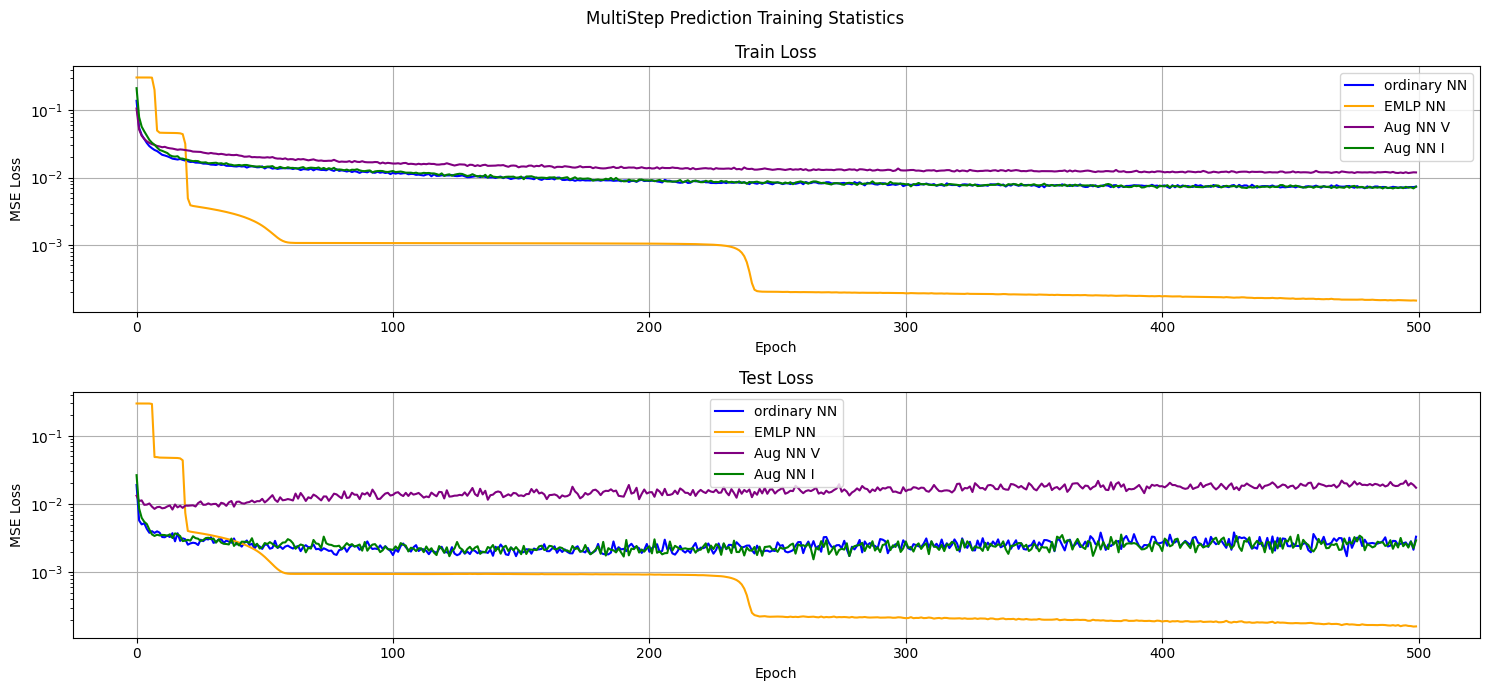

In [8]:
# Plot training statistics
plt.figure(figsize=(15, 7))

plt.subplot(2, 1, 1)
plt.plot(stats['train_loss'],label='ordinary NN',color='blue')
plt.plot(stats_emlp['train_loss'],label='EMLP NN',color='orange')
plt.plot(stats_aug_van['train_loss'],label='Aug NN V',color='purple')
plt.plot(stats_aug['train_loss'],label='Aug NN I',color='green')
plt.yscale('log')
plt.title('Train Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(stats['test_loss'],label='ordinary NN',color='blue')
plt.plot(stats_emlp['test_loss'],label='EMLP NN',color='orange')
plt.plot(stats_aug_van['test_loss'],label='Aug NN V',color='purple')
plt.plot(stats_aug['test_loss'],label='Aug NN I',color='green')
plt.yscale('log')
plt.title('Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

plt.suptitle('MultiStep Prediction Training Statistics')
plt.tight_layout()
plt.show()

In [9]:
print('Loading Two Body Dynamics dataset...') 
with open('Data/two_body_dataset.pkl','rb') as file:
    data_dict = pickle.load(file)

Loading Two Body Dynamics dataset...


In [10]:
test_coords = data_dict['test_coords']

In [11]:
last_sequence = test_coords[-1,:input_timesteps,:]
n_steps = len(test_coords[0,:,:])-len(last_sequence)

forecast = forecast_nn(model,last_sequence,n_steps,n_dim)
forecast_aug_v = forecast_nn(model_aug_van,last_sequence,n_steps,n_dim)
forecast_aug_i = forecast_nn(model_aug,last_sequence,n_steps,n_dim)
forecast_e = forecast_emlp(model_emlp,last_sequence,n_steps,n_dim)

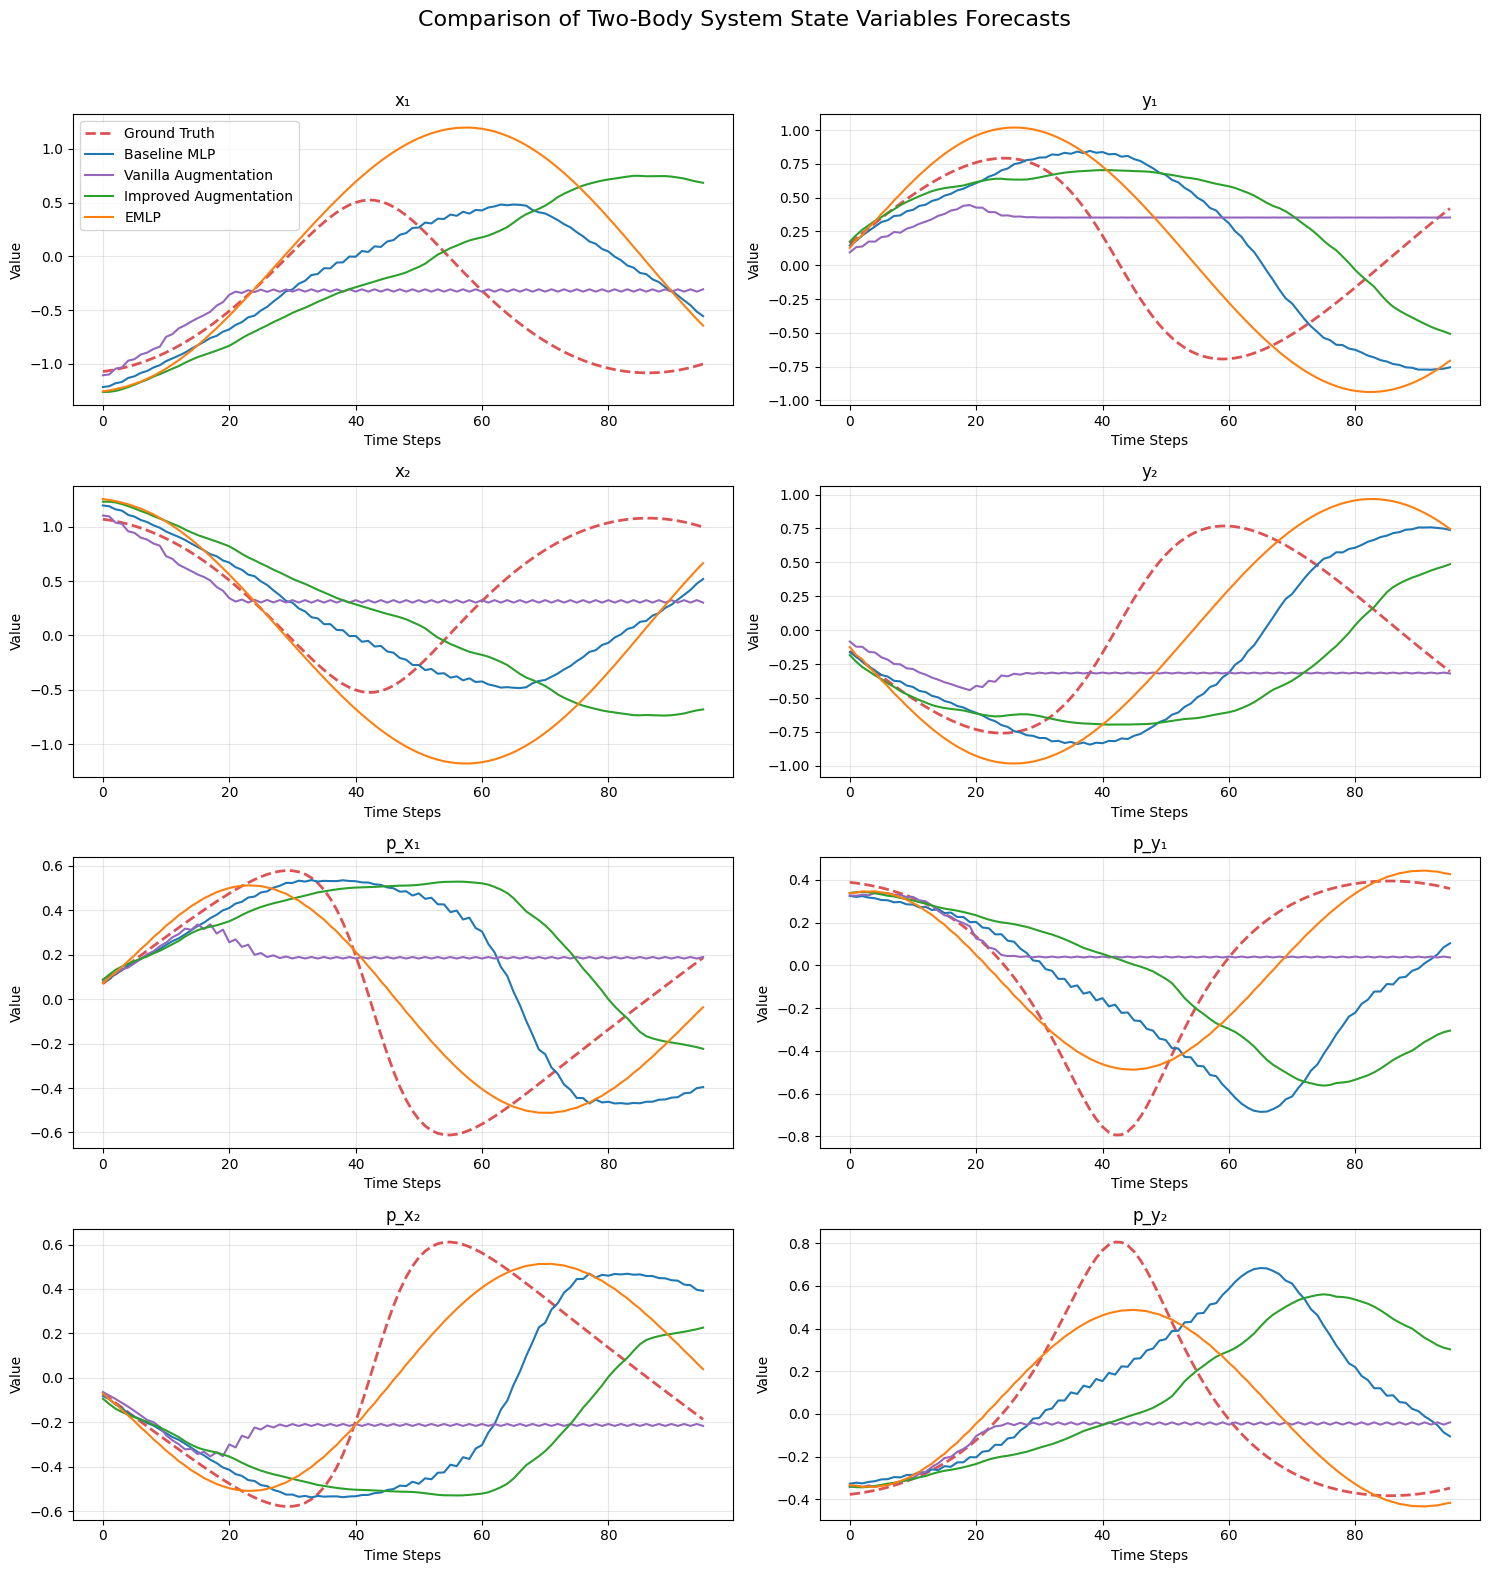

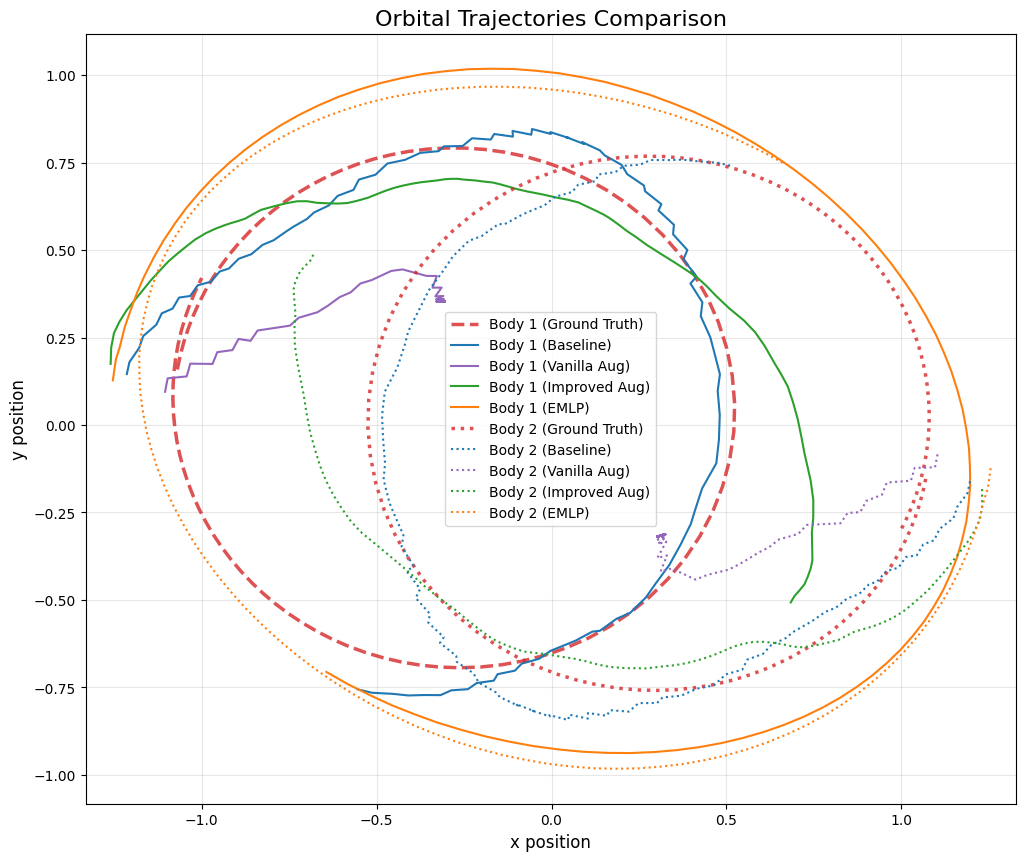

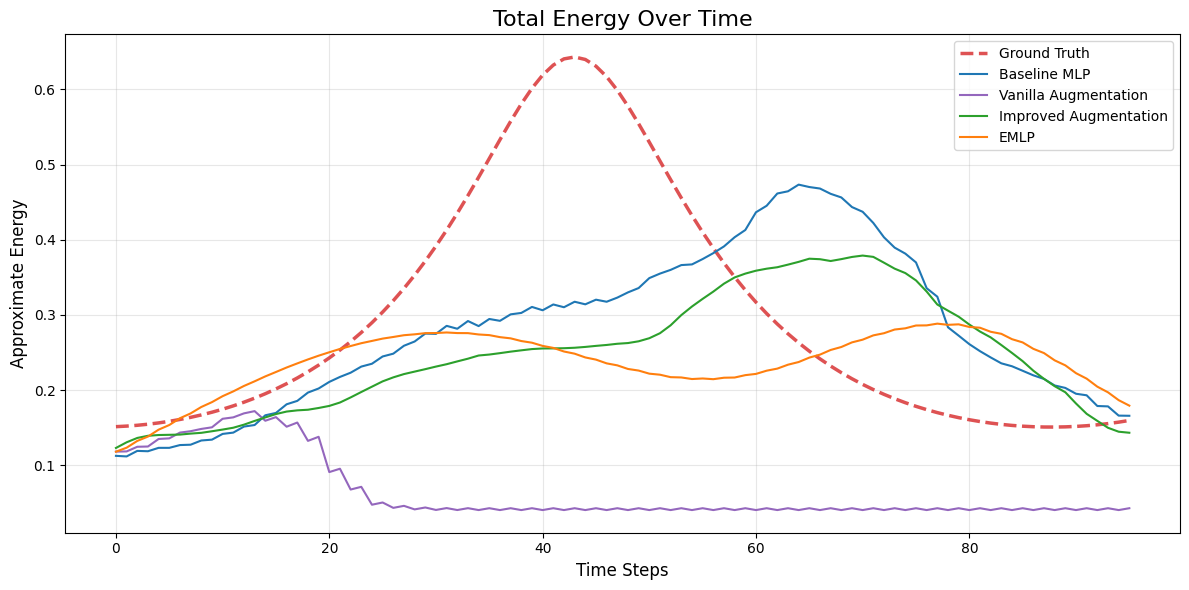

In [12]:
def plot_forecast_comparison(forecast, forecast_aug_v, forecast_aug_i, forecast_e, test_coords, input_timesteps):
    """
    Plot all 8 variables from four different forecast models for comparison.
    
    Parameters:
    -----------
    forecast : array - Baseline model predictions
    forecast_aug_v : array - Vanilla augmentation model predictions
    forecast_aug_i : array - Improved augmentation model predictions
    forecast_e : array - EMLP model predictions
    test_coords : array - Ground truth coordinates
    input_timesteps : int - Number of initial timesteps used for prediction
    """
    # Extract ground truth data for comparison
    n_steps = len(forecast)
    ground_truth = test_coords[0, input_timesteps:input_timesteps+n_steps]
    
    # Create time steps for x-axis
    time_steps = np.arange(n_steps)
    
    # Variable names for labels (assuming a two-body system like in the example)
    var_names = ['x₁', 'y₁', 'x₂', 'y₂', 'p_x₁', 'p_y₁', 'p_x₂', 'p_y₂']
    
    # Define a consistent color scheme
    colors = {
        'ground_truth': '#d62728',  # Red
        'baseline': '#1f77b4',      # Blue
        'aug_vanilla': '#9467bd',   # Purple
        'aug_improved': '#2ca02c',  # Green
        'emlp': '#ff7f0e'           # Orange
    }
    
    # Create a 4x2 grid of subplots
    fig, axes = plt.subplots(4, 2, figsize=(15, 16))
    fig.suptitle('Comparison of Two-Body System State Variables Forecasts', fontsize=16)
    
    # Plot all 8 variables
    for i, ax in enumerate(axes.flat):
        # Plot predictions from all models
        ax.plot(time_steps, ground_truth[:, i], '--', color=colors['ground_truth'], 
                label='Ground Truth', linewidth=2, alpha=0.8)
        ax.plot(time_steps, forecast[:, i], '-', color=colors['baseline'], 
                label='Baseline MLP', linewidth=1.5)
        ax.plot(time_steps, forecast_aug_v[:, i], '-', color=colors['aug_vanilla'], 
                label='Vanilla Augmentation', linewidth=1.5)
        ax.plot(time_steps, forecast_aug_i[:, i], '-', color=colors['aug_improved'], 
                label='Improved Augmentation', linewidth=1.5)
        ax.plot(time_steps, forecast_e[:, i], '-', color=colors['emlp'], 
                label='EMLP', linewidth=1.5)
        
        ax.set_title(f'{var_names[i]}', fontsize=12)
        ax.set_xlabel('Time Steps', fontsize=10)
        ax.set_ylabel('Value', fontsize=10)
        ax.grid(True, alpha=0.3)
        
        # Only add legend to the first plot to save space
        if i == 0:
            ax.legend(fontsize=10)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
    
    # Plot orbital trajectories of both bodies
    plt.figure(figsize=(12, 10))
    plt.title('Orbital Trajectories Comparison', fontsize=16)
    
    # Body 1 trajectories (positions x₁, y₁)
    plt.plot(ground_truth[:, 0], ground_truth[:, 1], '--', color=colors['ground_truth'], 
             label='Body 1 (Ground Truth)', linewidth=2.5, alpha=0.8)
    plt.plot(forecast[:, 0], forecast[:, 1], '-', color=colors['baseline'], 
             label='Body 1 (Baseline)', linewidth=1.5)
    plt.plot(forecast_aug_v[:, 0], forecast_aug_v[:, 1], '-', color=colors['aug_vanilla'], 
             label='Body 1 (Vanilla Aug)', linewidth=1.5)
    plt.plot(forecast_aug_i[:, 0], forecast_aug_i[:, 1], '-', color=colors['aug_improved'], 
             label='Body 1 (Improved Aug)', linewidth=1.5)
    plt.plot(forecast_e[:, 0], forecast_e[:, 1], '-', color=colors['emlp'], 
             label='Body 1 (EMLP)', linewidth=1.5)
    
    # Body 2 trajectories (positions x₂, y₂)
    plt.plot(ground_truth[:, 2], ground_truth[:, 3], ':', color=colors['ground_truth'], 
             label='Body 2 (Ground Truth)', linewidth=2.5, alpha=0.8)
    plt.plot(forecast[:, 2], forecast[:, 3], ':', color=colors['baseline'], 
             label='Body 2 (Baseline)', linewidth=1.5)
    plt.plot(forecast_aug_v[:, 2], forecast_aug_v[:, 3], ':', color=colors['aug_vanilla'], 
             label='Body 2 (Vanilla Aug)', linewidth=1.5)
    plt.plot(forecast_aug_i[:, 2], forecast_aug_i[:, 3], ':', color=colors['aug_improved'], 
             label='Body 2 (Improved Aug)', linewidth=1.5)
    plt.plot(forecast_e[:, 2], forecast_e[:, 3], ':', color=colors['emlp'], 
             label='Body 2 (EMLP)', linewidth=1.5)
    
    plt.xlabel('x position', fontsize=12)
    plt.ylabel('y position', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.legend(fontsize=10, loc='best')
    
    # Plot energy conservation (assuming Hamiltonian system)
    plt.figure(figsize=(12, 6))
    plt.title('Total Energy Over Time', fontsize=16)
    
    # Calculate approximate energy (kinetic + potential) if this is a Hamiltonian system
    # For simplicity, assuming masses are 1 and only considering kinetic energy from momenta
    # E ≈ (p_x₁² + p_y₁² + p_x₂² + p_y₂²)/2
    def approx_energy(data):
        return 0.5 * (data[:, 4]**2 + data[:, 5]**2 + data[:, 6]**2 + data[:, 7]**2)
    
    plt.plot(time_steps, approx_energy(ground_truth), '--', color=colors['ground_truth'], 
             label='Ground Truth', linewidth=2.5, alpha=0.8)
    plt.plot(time_steps, approx_energy(forecast), '-', color=colors['baseline'], 
             label='Baseline MLP', linewidth=1.5)
    plt.plot(time_steps, approx_energy(forecast_aug_v), '-', color=colors['aug_vanilla'], 
             label='Vanilla Augmentation', linewidth=1.5)
    plt.plot(time_steps, approx_energy(forecast_aug_i), '-', color=colors['aug_improved'], 
             label='Improved Augmentation', linewidth=1.5)
    plt.plot(time_steps, approx_energy(forecast_e), '-', color=colors['emlp'], 
             label='EMLP', linewidth=1.5)
    
    plt.xlabel('Time Steps', fontsize=12)
    plt.ylabel('Approximate Energy', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10, loc='best')
    
    plt.tight_layout()
    plt.show()

# Call the function with your data
# plot_forecast_comparison(
#     forecast[:50,:], 
#     forecast_aug_v[:50,:], 
#     forecast_aug_i[:50,:], 
#     forecast_e[:50,:], 
#     test_coords[:50,:], 
#     input_timesteps, 
# )

plot_forecast_comparison(
    forecast, 
    forecast_aug_v, 
    forecast_aug_i, 
    forecast_e, 
    test_coords, 
    input_timesteps, 
)

In [13]:
## Computing Error metrics 

n = 10  # Number of samples
indices = np.random.choice(test_coords.shape[0], min(n,test_coords.shape[0]), replace=False)

def mse_comp(arr1,arr2):
    assert arr1.shape == arr2.shape 

    squared_diff = (arr1-arr2)**2 
    return np.mean(squared_diff)

mse = {
    'MO NN':[],
    'MO NN EMLP':[],
    'MO NN Aug V':[], 
    'MO NN Aug I': [],
}

for i,idx in enumerate(indices):
    print(f'Trial {i+1}')
    sim = test_coords[idx,input_timesteps:,:]

    last_sequence = test_coords[idx,:input_timesteps,:]
    n_steps = len(test_coords[idx,:,:])-len(last_sequence)

    nn_forecast = forecast_nn(model,last_sequence,n_steps,n_dim)
    aug_V_forecast = forecast_nn(model_aug_van,last_sequence,n_steps,n_dim)
    aug_I_forecast = forecast_nn(model_aug,last_sequence,n_steps,n_dim)
    emlp_forecast = forecast_emlp(model_emlp,last_sequence,n_steps,n_dim)



    mse['MO NN'].append(mse_comp(sim,nn_forecast))
    mse['MO NN EMLP'].append(mse_comp(sim,emlp_forecast))
    mse['MO NN Aug V'].append(mse_comp(sim,aug_V_forecast))
    mse['MO NN Aug I'].append(mse_comp(sim,aug_I_forecast))



Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Trial 10


In [14]:
for k in mse.keys():
    print(f'{k} : {np.mean(mse[k])}')

MO NN : 0.2981980504708321
MO NN EMLP : 0.37178363782233986
MO NN Aug V : 0.25296478475294726
MO NN Aug I : 0.3813730755904292


In [15]:
print('MO NN :',stats['test_loss'][-1])
print('MO NN EMLP :',stats_emlp['test_loss'][-1])
print('MO NN Aug:',stats_aug['test_loss'][-1])

MO NN : 0.0033174947103751557
MO NN EMLP : 0.00016084449
MO NN Aug: 0.0029300689763788667
